<a href="https://colab.research.google.com/github/dfneto/itacademy/blob/main/sprint4_visualization_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1
Realizar la práctica del notebook en GitHub" 03 EXAMINING DATA" ✅

# Ejercicio 2
Realiza las tareas de preprocesado y adecuación del Dataset que disponemos en el repositorio de GitHub  PRE-PROCESSING-FECHA con el objetivo de prepararlo y trabajarlo como dataframe para extraer información.

In [76]:
# Importing the libraries and load the data
import pandas as pd

# Define the column names
column_names = ['ID', 'title', 'genre']

# Read the .dat file
df = pd.read_csv('/content/movies.dat', sep='::', engine='python', names=column_names, encoding='latin-1', header=None)

# Split the 'genre' column into a list
df['genre'] = df['genre'].str.split('|')

# Extract year from the 'Title' column using a regular expression
# The regular expression pattern (\\(\d{4}\\)) matches four digits inside parentheses
df['year'] = df['title'].str.extract('(\(\d{4}\))', expand=False)

# Remove the year from the Title column
df['title'] = df['title'].str.replace(r' \(\d{4}\)', '', regex=True)

# Remove parentheses from 'Year' column
df['year'] = df['year'].str.strip('()')

# Convert Year to an integer
df['year'] = df['year'].astype(int)

 # Reorder columns
df = df[['ID', 'title', 'year', 'genre']]

df = df.drop('ID', axis=1)

# Check the DataFrame
print(df.head())



                         title  year                             genre
0                    Toy Story  1995   [Animation, Children's, Comedy]
1                      Jumanji  1995  [Adventure, Children's, Fantasy]
2             Grumpier Old Men  1995                 [Comedy, Romance]
3            Waiting to Exhale  1995                   [Comedy, Drama]
4  Father of the Bride Part II  1995                          [Comedy]


# Ejercicio 3
Muestra tu creatividad. ¿Qué crees relevante mostrar del Dataset " movies.dat " del ejercicio anterior?

Realiza una o dos representaciones gráficas y justifica tu elección.

First let's analyse a little bit the data

In [77]:
df.shape #(3883, 3)
df.columns

Index(['title', 'year', 'genre'], dtype='object')

In [78]:
df.year.nunique() #81
df.year.unique()

array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1963,
       1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921])

In [79]:
df.title.nunique()
df.describe()
df.dtypes
df.ndim
df.isnull().sum()

title    0
year     0
genre    0
dtype: int64

In [80]:
# import the seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

Let's see the distribution of the movies beyond the years.

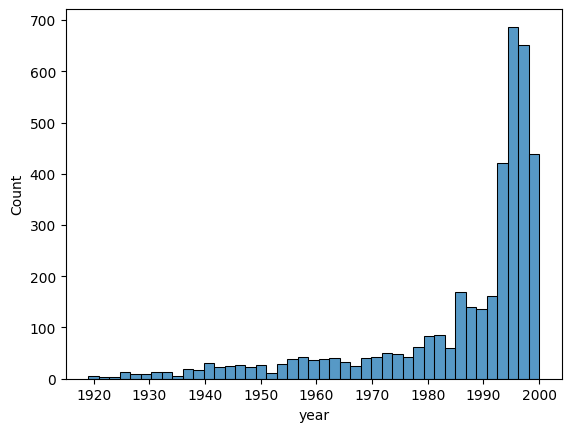

In [81]:
sns.histplot(data=df["year"]);

We can see graphicaly that there are more movies produced in between 1990 and 2000 than 1920 and 1990.

Now we are goint to plot the genre movies beyond the years. But for this we need to know what are the distinct genres.

In [82]:
genre_set = set()
for genre_list in df['genre']:
  for genre in genre_list:
    genre_set.add(genre)
print(genre_set)

{'Film-Noir', 'Crime', 'Documentary', 'Thriller', 'Sci-Fi', 'Drama', 'Comedy', 'Action', 'Mystery', 'Animation', 'Romance', 'Horror', 'Musical', 'Western', 'Adventure', 'War', 'Fantasy', "Children's"}


I realized that it is not necessary because there's a function that does it easily as we can see:

In [83]:
df_exploded = df.explode('genre')
df_exploded.head()

,title,year,genre
0,Toy Story,1995,Animation
0,Toy Story,1995,Children's
0,Toy Story,1995,Comedy
1,Jumanji,1995,Adventure
1,Jumanji,1995,Children's


In [84]:
# Each row is a unique movie-genre combination.

# Step 1: Count the number of movies per year for each genre.
# We will create a new DataFrame 'df_genre_year' with 'year', 'genre' and 'count' columns.
df_genre_year = df_exploded.groupby(['year', 'genre']).size().reset_index(name='count')
df_genre_year.head(10)

,year,genre,count
0,1919,Action,1
1,1919,Adventure,1
2,1919,Comedy,1
3,1919,Drama,2
4,1920,Comedy,2
5,1921,Action,1
6,1922,Drama,1
7,1922,Horror,1
8,1923,Comedy,2
9,1923,Drama,1


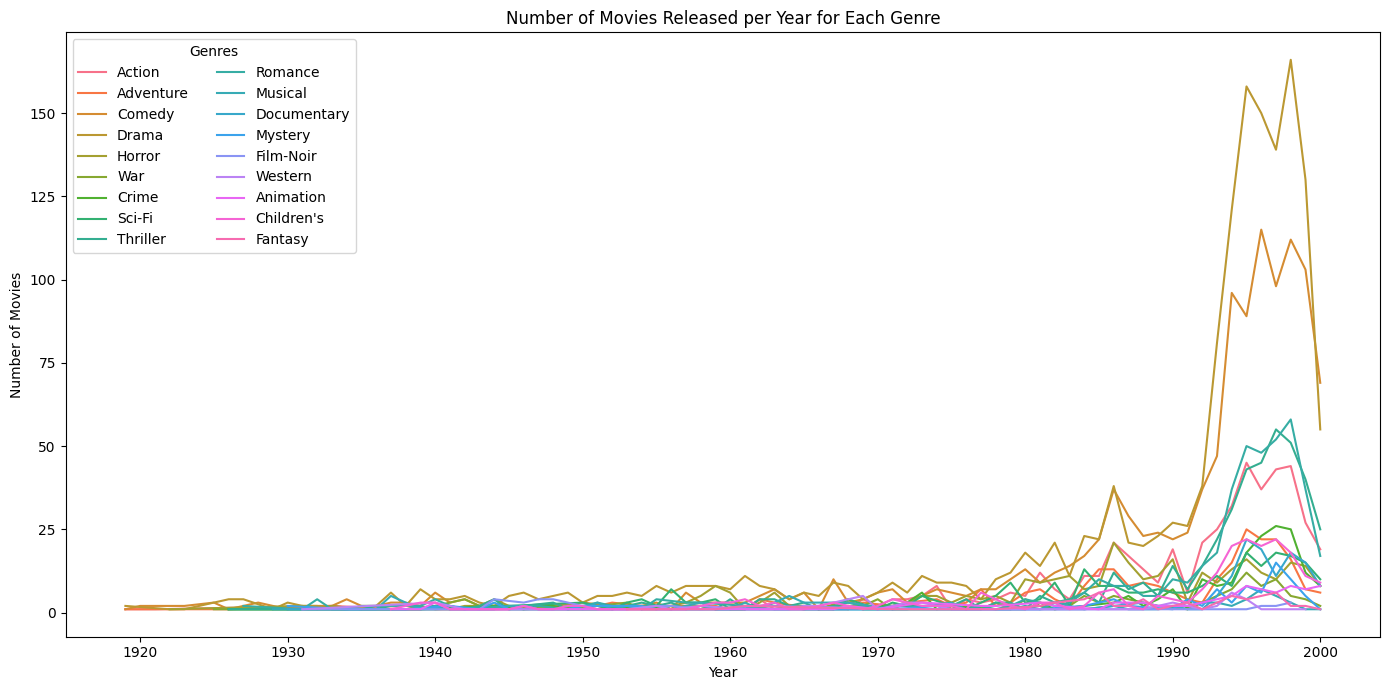

In [85]:
# Step 2: Use sns.lineplot to plot the counts for each genre across years.
plt.figure(figsize=(14, 7))

# Create a line plot for each genre
sns.lineplot(data=df_genre_year, x='year', y='count', hue='genre')

# Enhance the plot
plt.title('Number of Movies Released per Year for Each Genre')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genres', loc='upper left', ncol=2)  # Adjust the legend to be in the upper left and not cover the plot
plt.tight_layout()  # Adjust the padding of the figure

# Show the plot
plt.show()

Let's see the distribution by genre, now. We want something like this, but for each cathegory:

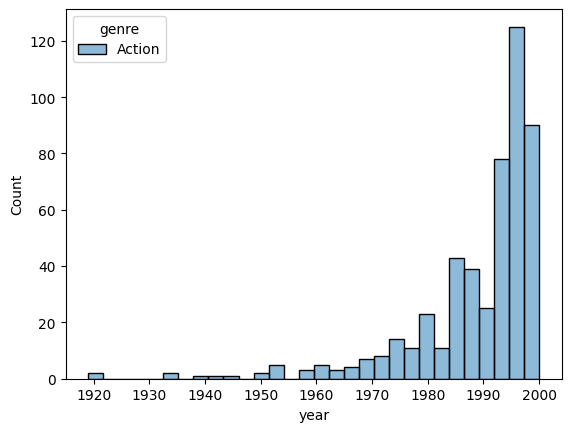

In [88]:
sns.histplot(df_exploded[df_exploded.genre == 'Action'], x='year', hue="genre");
# for i in df_exploded.genre.unique():
#   sns.histplot(data=df_exploded[df_exploded.genre == i]);

I thought that would be necessary to create a pretty complicated for to plot each histogram in a diferente image position, but again there was something specific to it, the FacetGrid.

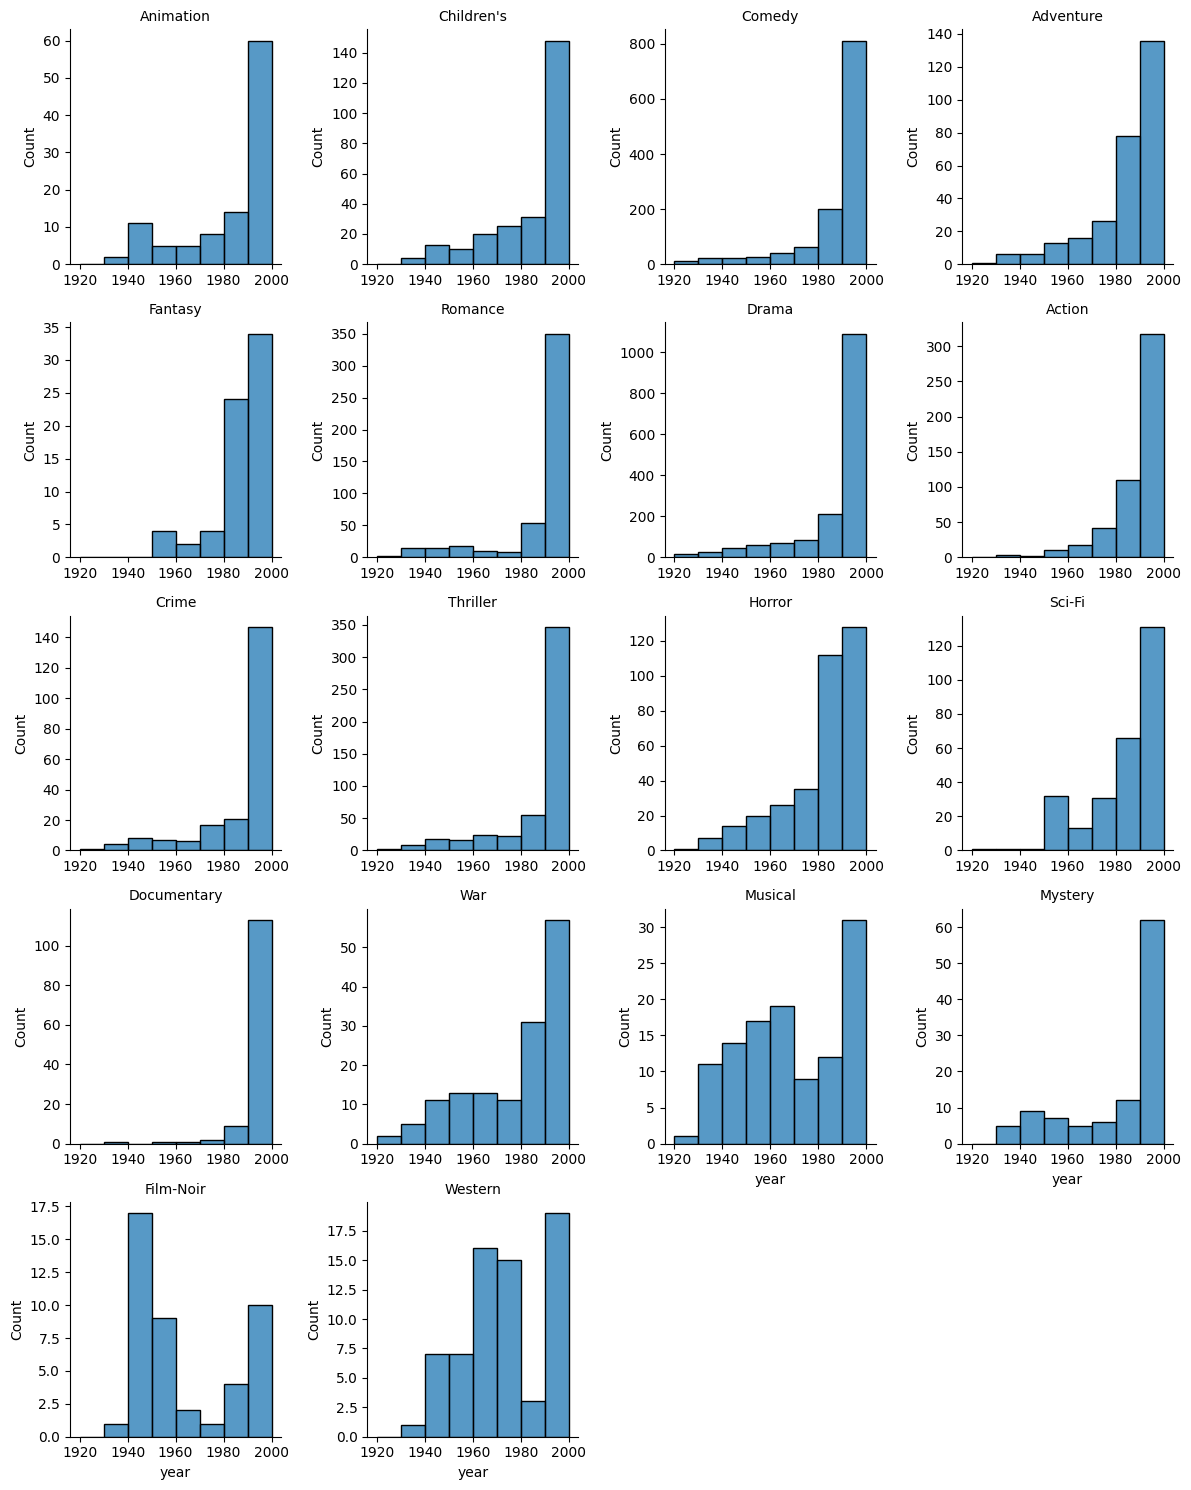

In [94]:
# Set up a grid of plots. The col='genre' argument specifies that each subplot will correspond to a different genre.
g = sns.FacetGrid(df_exploded, col='genre', col_wrap=4, sharex=False, sharey=False) #sharex=False and sharey=False are set to allow each subplot to have its own x and y axis scales.

bins = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]

# Apply histplot to each subplot
g.map(sns.histplot, 'year', bins=bins) #applies the histplot to each subplot in the grid, plotting the 'year' distribution for each 'genre'.

# Enhance the plot
g.set_titles('{col_name}')  # Set titles for each subplot
plt.show()

It's interesting to see that thriller and action are the categories with the most movies in the last years (around 300 and 350 movies), but still are pretty behind of comedy and drama genre (800 and 1000). And we can see this also in the heatmap bellow.

<Axes: xlabel='year', ylabel='genre'>

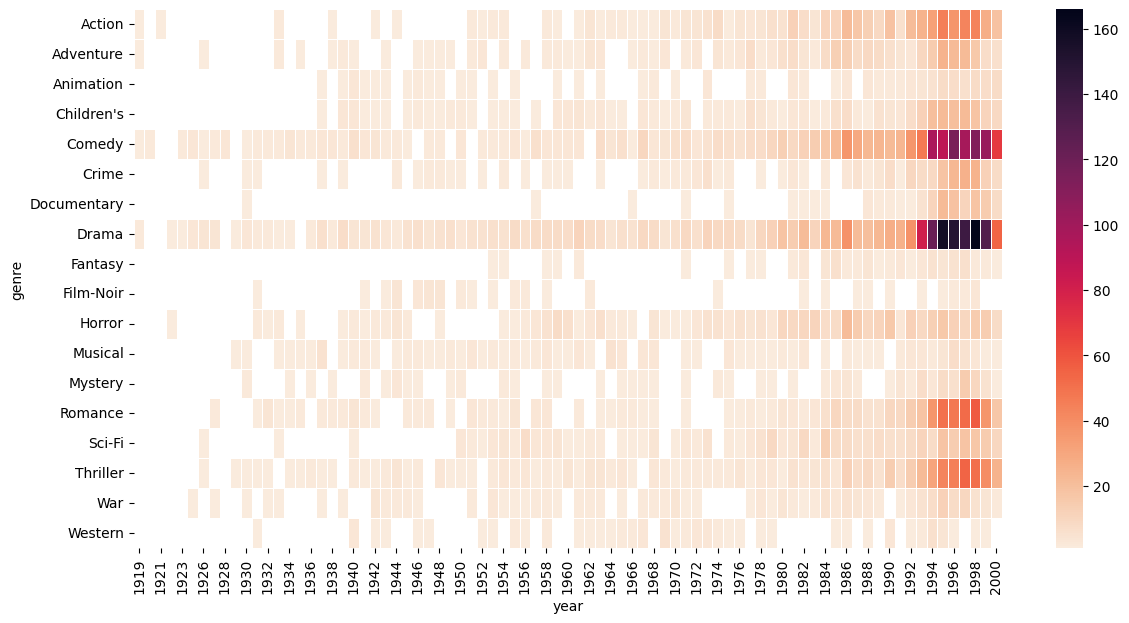

In [101]:
plt.figure(figsize=(14, 7))
pivot_data = df_genre_year.pivot_table(values='count', index='genre', columns='year', aggfunc='sum')
sns.heatmap(pivot_data, fmt=".2f", linewidth=.5, cmap="rocket_r")